In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
last_date_str = session.query(measurement.date).order_by(measurement.date.desc()).limit(1).scalar()
last_date_str

'2017-08-23'

SELECT date, AVG(prcp)
From measurments
WHERE date >= year_before_last
GROUP BY date 

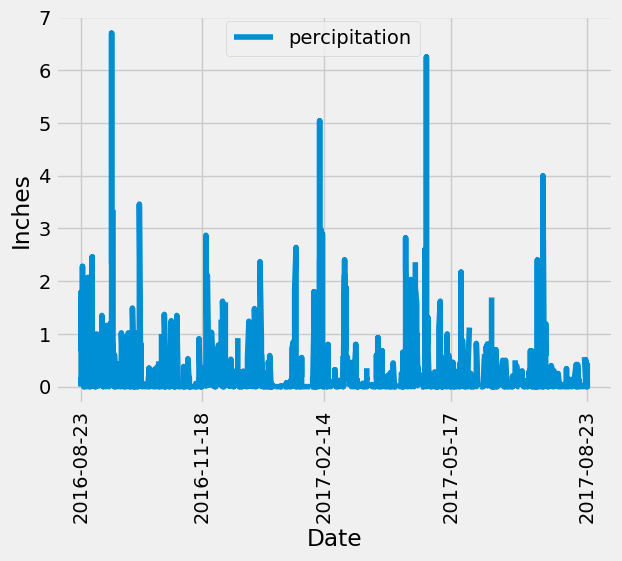

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.date.fromisoformat(last_date_str)
# Calculate the date one year from the last date in data set.
year_before_last = last_date - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precipiation_score_query = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= year_before_last)\
    .order_by(measurement.date)\
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ['date', 'precipitation']
precipiation_df = pd.DataFrame(precipiation_score_query, columns=column_names)

# Sort the dataframe by date
precipiation_df = precipiation_df.sort_values(['date'])

# Use Pandas Plotting with Matplotlib to plot the data
x = precipiation_df['date']
step = max(1, len(precipiation_df['date']) // 4)
y = precipiation_df['precipitation']
plt.plot(x,y)
plt.xticks(precipiation_df['date'][::step], rotation=90 )
plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(["percipitation"], loc='upper center', bbox_to_anchor=(0.48, 1.01))

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipiation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).all()
total_stations

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station_info = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_station_info

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == active_station_info[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

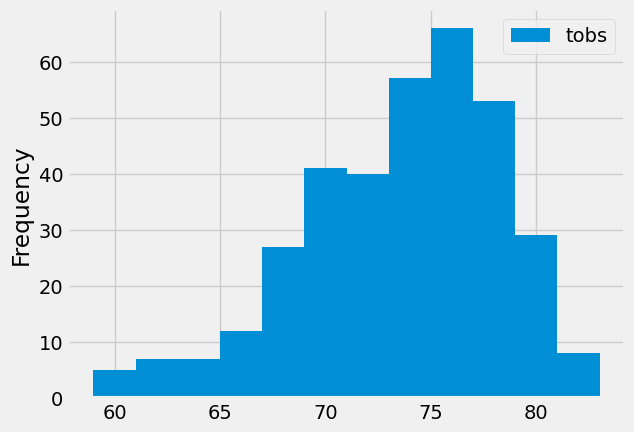

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(measurement.tobs)\
    .filter(measurement.station == active_station_info[0][0]).\
    filter(measurement.date >= year_before_last).all()
temp_df = pd.DataFrame(temp_query, columns = ["tobs"])
temp_df.plot.hist(bins = 12)

# Close Session

In [39]:
# Close Session
session.close()